In [19]:
using Plots
ENV["MPLBACKEND"] = "Agg"
pyplot()
n = 50
cs = Plots.unzip(Plots.partialcircle(0.5π, 11π/6, 3, 10))

([6.123233995736766e-16,-8.660254037844389,8.660254037844384],[10.0,-4.999999999999997,-5.000000000000004])

In [20]:
xs = 3randn(n,3)
ys = 3randn(n,3)
for i in 1:3
    xs[:,i] += cs[1][i]
    ys[:,i] += cs[2][i]
end

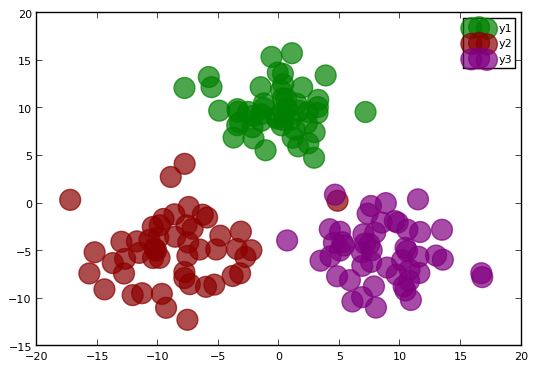

In [21]:
colors = [:green,:darkred,:purple]
# colors = map(c->Plots.convertColor(c,0.5), colors)
scatter(xs, ys, grid=false, m=(colors',15,0.7,stroke(1)), markerstrokecolor=colors')

In [22]:
using OnlineAI
gradientModel = AdaMaxModel(η=1e-4, ρ1=0.9, ρ2=0.9)
learningRateModel = AdaptiveLearningRate(gradientModel, 2e-2, 0.05, wgt=ExponentialWeighting(30))
net = buildTanhClassificationNet(2, 1, [10,10,10],
    params = NetParams(gradientModel = gradientModel),
solverParams = SolverParams(maxiter=300000,erroriter=50000))

NeuralNet{
  params: NetParams{OnlineAI.AdaMaxModel(0.0001,0.9,0.9,1.0e-6) NoDropout OnlineAI.L2CostModel()}
  solverParams: OnlineAI.SolverParams(300000,50000,10000,-1,[:x,:xhat,:y,:Σ,:a],100,1.0e-5,OnlineAI.donothing)
  layers:
    NormalizedLayer{2=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>1 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
}


In [23]:
dps = DataPoints(hcat(reshape(xs,3n,1),reshape(ys,3n,1)), vcat(-ones(n), zeros(n), ones(n)))
sampler = SimpleSampler(dps)
solve!(net, sampler, sampler)


solve: NeuralNet{
  params: NetParams{OnlineAI.AdaMaxModel(0.0001,0.9,0.9,1.0e-6) NoDropout OnlineAI.L2CostModel()}
  solverParams: OnlineAI.SolverParams(300000,50000,10000,-1,[:x,:xhat,:y,:Σ,:a],100,1.0e-5,OnlineAI.donothing)
  layers:
    NormalizedLayer{2=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>10 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{10=>1 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
}


Status: SolverStats{RUNNING n=50000, trainerr=0.6654923140170397, valerr=0.6654923140170397, besterr=Inf, epochSinceImprovement=0}
Status: SolverStats{RUNNING n=100000, trainerr=0.6959215644284278, valerr=0.6959215644284278, besterr=0.6654923140170397, epochSinceImprovement=0}
Status: SolverStats{RUNNING n=150000, trainerr=0.6324453855591099, valerr=0.6324453855591099, besterr=0.6654923140170397, epochSinceImprovement=1}
Status: Sol

SolverStats{MAXITER n=300000, trainerr=0.5765993172821795, valerr=0.5765993172821795, besterr=0.5765993172821795, epochSinceImprovement=0}

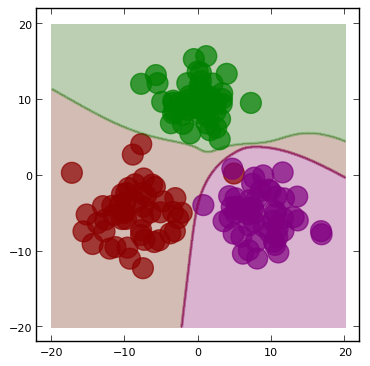

In [28]:

ENV["MPLBACKEND"] = "Agg"
pyplot()
x = linspace(-20, 20, 1000)

# make the gradient go from red to blue
cmap = ColorGradient(colors, alpha=0.3)
function surf(x,y)
    z = predict(net, Float64[x,y])[1]
    if z < -0.5
        -1.0
    elseif z > 0.5
        1.0
    else
        0.0
    end
end

# use contours to show the predictions from the neural net
p = plot(x, x, surf, w=2, fill=true, c=cmap, leg=false, grid=false, nlevels=3, size=(400,400))
# scatter!(xs, ys, grid=false, m=(colors',15,0.5))
scatter!(xs, ys, grid=false, m=(colors',15,0.7,stroke(1)), markerstrokecolor=colors')

In [ ]:
x,y = OnlineAI.unzip(dps)
yhat = predict(net, x)